# Code to generate random incompressible flow snap-shots

In [1]:
import numpy as np
import scipy as sp
import scipy.ndimage
import matplotlib.pyplot as plt
import cv2

## Parameters

In [2]:
GridSize = 100
SmoothenSigma = 10

## Random seed-field

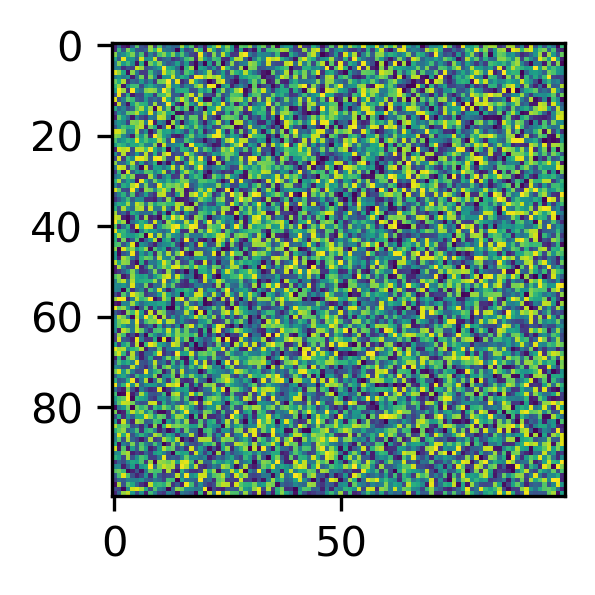

In [3]:
RandomField = np.random.rand( GridSize , GridSize )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.imshow( RandomField )
plt.show()

## Smooth the random field

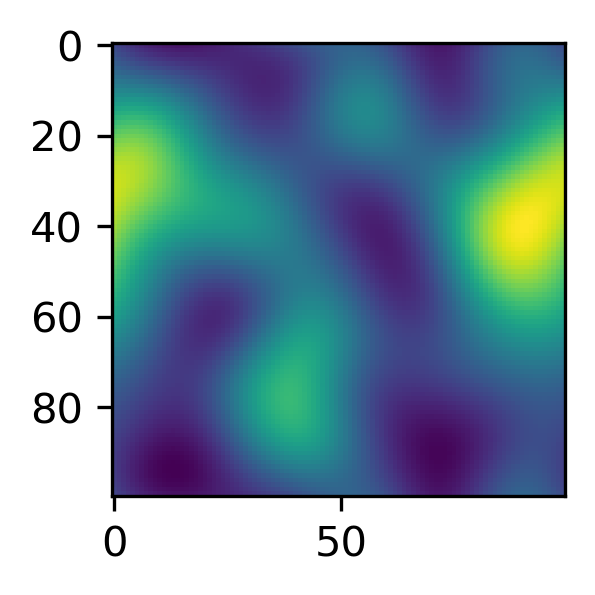

In [4]:
StreamFunction = sp.ndimage.gaussian_filter( RandomField , sigma=SmoothenSigma , mode='wrap' )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.imshow( StreamFunction )
plt.show()

## Flow from stream function: $\psi$
### For any smooth random scalar field $\psi$, the velocity field is given by
### $ \vec{u} = \nabla \times \psi $
### such that, $\nabla . \vec{u} = 0$, i.e. incompressible.

## Calculation of velocity field

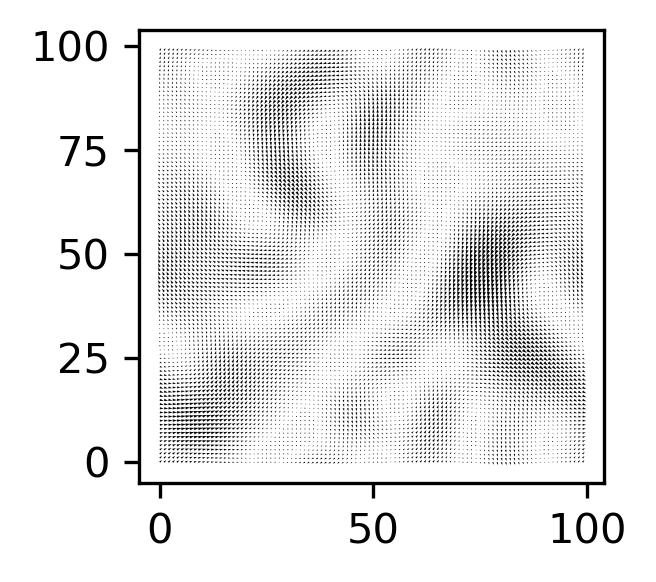

In [5]:
Vx =  np.gradient( StreamFunction , axis=0 )
Vy = -np.gradient( StreamFunction , axis=1 )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.quiver( Vx , Vy , units='width' )
plt.show()

## Vorticity: $\omega$
### In 2D,
### $\omega = \nabla \times \vec{u} = \nabla^2 \psi$

## Calculation of vorticity

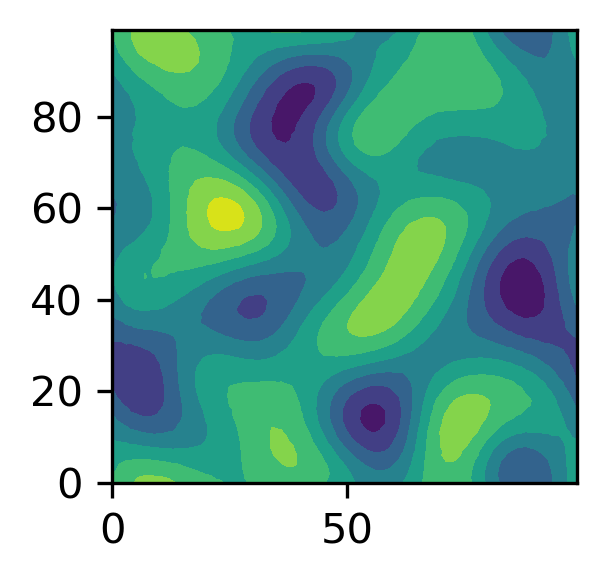

In [6]:
Vorticity = sp.ndimage.laplace( StreamFunction , mode='wrap' )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.contourf( Vorticity )
plt.show()

## Save the velocity fields

In [7]:
np.save( 'Vx.npy' , Vx )
np.save( 'Vy.npy' , Vy )